In [22]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats
from sklearn.metrics import mean_squared_error, r2_score, explained_variance_score

from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import f_regression 
from math import sqrt
import matplotlib.pyplot as plt
from pydataset import data

from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings('ignore')

from sklearn.feature_selection import SelectKBest, RFE, f_regression, SequentialFeatureSelector

#### 1. Load the tips dataset.

In [2]:
tips = data('tips')

In [3]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
1,16.99,1.01,Female,No,Sun,Dinner,2
2,10.34,1.66,Male,No,Sun,Dinner,3
3,21.01,3.50,Male,No,Sun,Dinner,3
4,23.68,3.31,Male,No,Sun,Dinner,2
5,24.59,3.61,Female,No,Sun,Dinner,4


a. Create a column named price_per_person. This should be the total bill divided by the party size.

In [8]:
tips['price_per_person'] = round(tips['total_bill'] / tips['size'], 2)

In [9]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size,price_per_person
1,16.99,1.01,Female,No,Sun,Dinner,2,8.49
2,10.34,1.66,Male,No,Sun,Dinner,3,3.45
3,21.01,3.50,Male,No,Sun,Dinner,3,7.00
4,23.68,3.31,Male,No,Sun,Dinner,2,11.84
5,24.59,3.61,Female,No,Sun,Dinner,4,6.15


b. Before using any of the methods discussed in the lesson, which features do you think would be most important for predicting the tip amount?

In [ ]:
# predicted features of importance:  size, time, and sex

c. Use select k best to select the top 2 features for predicting tip amount. What are they?


In [10]:
tips.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 244 entries, 1 to 244
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   total_bill        244 non-null    float64
 1   tip               244 non-null    float64
 2   sex               244 non-null    object 
 3   smoker            244 non-null    object 
 4   day               244 non-null    object 
 5   time              244 non-null    object 
 6   size              244 non-null    int64  
 7   price_per_person  244 non-null    float64
dtypes: float64(3), int64(1), object(4)
memory usage: 17.2+ KB


In [14]:
tips = pd.concat(
[tips, pd.get_dummies(tips[['sex', 'smoker', 'day', 'time']],
                     drop_first=True)], axis=1)

In [15]:
tips

,total_bill,tip,sex,smoker,day,time,size,price_per_person,sex_Male,smoker_Yes,day_Sat,day_Sun,day_Thur,time_Lunch
1,16.99,1.01,Female,No,Sun,Dinner,2,8.49,0,0,0,1,0,0
2,10.34,1.66,Male,No,Sun,Dinner,3,3.45,1,0,0,1,0,0
3,21.01,3.50,Male,No,Sun,Dinner,3,7.00,1,0,0,1,0,0
4,23.68,3.31,Male,No,Sun,Dinner,2,11.84,1,0,0,1,0,0
5,24.59,3.61,Female,No,Sun,Dinner,4,6.15,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
240,29.03,5.92,Male,No,Sat,Dinner,3,9.68,1,0,1,0,0,0
241,27.18,2.00,Female,Yes,Sat,Dinner,2,13.59,0,1,1,0,0,0
242,22.67,2.00,Male,Yes,Sat,Dinner,2,11.34,1,1,1,0,0,0
243,17.82,1.75,Male,No,Sat,Dinner,2,8.91,1,0,1,0,0,0


In [16]:
tips = tips.drop(columns=['sex', 'smoker', 'day', 'time'])

<class 'pandas.core.frame.DataFrame'>
Int64Index: 244 entries, 1 to 244
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   total_bill        244 non-null    float64
 1   tip               244 non-null    float64
 2   size              244 non-null    int64  
 3   price_per_person  244 non-null    float64
 4   sex_Male          244 non-null    uint8  
 5   smoker_Yes        244 non-null    uint8  
 6   day_Sat           244 non-null    uint8  
 7   day_Sun           244 non-null    uint8  
 8   day_Thur          244 non-null    uint8  
 9   time_Lunch        244 non-null    uint8  
dtypes: float64(3), int64(1), uint8(6)
memory usage: 11.0 KB


In [20]:
train_validate, test = train_test_split(tips)
train, validate = train_test_split(train_validate)

In [21]:
X_train = tips.drop(columns='tip')
y_train = tips['tip']

In [24]:
# make the thing

kbest_2 = SelectKBest(f_regression, k=2)

# fit the thing

_ = kbest_2.fit(X_train, y_train)

In [25]:
kbest_2.get_support()

array([ True,  True, False, False, False, False, False, False, False])

In [26]:
X_train.iloc[:, kbest_2.get_support()]

,total_bill,size
1,16.99,2
2,10.34,3
3,21.01,3
4,23.68,2
5,24.59,4
...,...,...
240,29.03,3
241,27.18,2
242,22.67,2
243,17.82,2


In [27]:
X_train.columns[kbest_2.get_support()]

Index(['total_bill', 'size'], dtype='object')

d. Use recursive feature elimination to select the top 2 features for tip amount. What are they?

In [28]:
model = LinearRegression()

In [29]:
rfe = RFE(model, n_features_to_select=2)

In [30]:
rfe.fit(X_train, y_train)

RFE(estimator=LinearRegression(), n_features_to_select=2)

In [31]:
X_train.columns[rfe.get_support()]

Index(['total_bill', 'smoker_Yes'], dtype='object')

In [32]:
pd.DataFrame(rfe.transform(X_train), columns=X_train.columns[rfe.get_support()], index=X_train.index)

,total_bill,smoker_Yes
1,16.99,0.0
2,10.34,0.0
3,21.01,0.0
4,23.68,0.0
5,24.59,0.0
...,...,...
240,29.03,0.0
241,27.18,1.0
242,22.67,1.0
243,17.82,0.0


e. Why do you think select k best and recursive feature elimination might give different answers for the top features? Does this change as you change the number of features you are selecting?

In [ ]:
# Select K Best finds and uses the top correlated X features to the y target while RFE chips away 
# at the features one by one by looking at how they do in a Linear Regression model. 

In [33]:
# make the thing

kbest_3 = SelectKBest(f_regression, k=3)

# fit the thing

_ = kbest_3.fit(X_train, y_train)

# use the thing

X_train.columns[kbest_3.get_support()]

Index(['total_bill', 'size', 'price_per_person'], dtype='object')

In [34]:
# make the thing

kbest_1 = SelectKBest(f_regression, k=1)

# fit the thing

_ = kbest_1.fit(X_train, y_train)

# use the thing

X_train.columns[kbest_1.get_support()]

Index(['total_bill'], dtype='object')

In [35]:
# make the thing

kbest_4 = SelectKBest(f_regression, k=4)

# fit the thing

_ = kbest_4.fit(X_train, y_train)

# use the thing

X_train.columns[kbest_4.get_support()]

Index(['total_bill', 'size', 'price_per_person', 'day_Sun'], dtype='object')

In [36]:
# make the thing

rfe_3 = RFE(model, n_features_to_select=3)

# fit the thing

rfe_3.fit(X_train, y_train)

# use the thing

X_train.columns[rfe_3.get_support()]

Index(['total_bill', 'smoker_Yes', 'day_Sat'], dtype='object')

In [37]:
# make the thing

rfe_4 = RFE(model, n_features_to_select=4)

# fit the thing

rfe_4.fit(X_train, y_train)

# use the thing

X_train.columns[rfe_4.get_support()]

Index(['total_bill', 'smoker_Yes', 'day_Sat', 'day_Thur'], dtype='object')

In [38]:
# make the thing

rfe_1 = RFE(model, n_features_to_select=1)

# fit the thing

rfe_1.fit(X_train, y_train)

# use the thing

X_train.columns[rfe_1.get_support()]

Index(['smoker_Yes'], dtype='object')

#### 2. Write a function named select_kbest that takes in the predictors (X), the target (y), and the number of features to select (k) and returns the names of the top k selected features based on the SelectKBest class. Test your function with the tips dataset. You should see the same results as when you did the process manually.

In [60]:
def select_kbest(X, y, k):
    kbest =  SelectKBest(f_regression, k=k)
    
    _ = kbest.fit(X, y)
    
    kbest_df = pd.DataFrame(
    {
        'statistical_f_values': [*kbest.scores_],
        'p_values': [*kbest.pvalues_],
        'selected': [*kbest.get_support()]
    }, index = X.columns
    )
    
    cols = []
    
    cols = [*X.columns[kbest.get_support()]]
    
    print(f'The features selected with the k value set to {k} are as follows:\n {cols}')
    
    return kbest_df

In [61]:
select_kbest(X_train, y_train, k=2)

The features selected with the k value set to 2 are as follows:
 ['total_bill', 'size']


,statistical_f_values,p_values,selected
total_bill,203.357723,6.692471e-34,True
size,76.175426,4.300543e-16,True
price_per_person,33.215940,2.499068e-08,False
sex_Male,1.926155,1.664562e-01,False
smoker_Yes,0.008506,9.265932e-01,False
day_Sat,0.001884,9.654161e-01,False
day_Sun,3.848390,5.094012e-02,False
day_Thur,2.245302,1.353240e-01,False
time_Lunch,3.633815,5.780153e-02,False


#### 3. Write a function named rfe that takes in the predictors, the target, and the number of features to select. It should return the top k features based on the RFE class. Test your function with the tips dataset. You should see the same results as when you did the process manually.

In [74]:
def rfe(X, y, n):
    model = LinearRegression()
    rfe = RFE(model, n_features_to_select=n)
    rfe.fit(X, y)
    
    rfe_df = pd.DataFrame(
    {
        'feature_ranking': [*rfe.ranking_],
        'selected': [*rfe.get_support()]
    }, index = X.columns
    )
    
    cols = []
    
    cols = [*X.columns[rfe.get_support()]]
    
    print(f'The {n} features selected are as follows:\n {cols}')
    
    return rfe_df

In [65]:
rfe(X_train, y_train, 2)

The features selected with the number of features to select being 2 are as follows:
 ['total_bill', 'smoker_Yes']


,feature_ranking,selected
total_bill,1,True
size,6,False
price_per_person,5,False
sex_Male,7,False
smoker_Yes,1,True
day_Sat,2,False
day_Sun,8,False
day_Thur,3,False
time_Lunch,4,False


In [75]:
rfe(X_train, y_train, 3)

The 3 features selected are as follows:
 ['Examination', 'Education', 'Infant.Mortality']


,feature_ranking,selected
Agriculture,2,False
Examination,1,True
Education,1,True
Catholic,3,False
Infant.Mortality,1,True


#### 4. Load the swiss dataset and use all the other features to predict Fertility. Find the top 3 features using both select k best and recursive feature elimination (use the functions you just built to help you out).

In [67]:
swiss = data('swiss')

In [68]:
swiss.head()

,Fertility,Agriculture,Examination,Education,Catholic,Infant.Mortality
Courtelary,80.2,17.0,15,12,9.96,22.2
Delemont,83.1,45.1,6,9,84.84,22.2
Franches-Mnt,92.5,39.7,5,5,93.40,20.2
Moutier,85.8,36.5,12,7,33.77,20.3
Neuveville,76.9,43.5,17,15,5.16,20.6


<class 'pandas.core.frame.DataFrame'>
Index: 47 entries, Courtelary to Rive Gauche
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Fertility         47 non-null     float64
 1   Agriculture       47 non-null     float64
 2   Examination       47 non-null     int64  
 3   Education         47 non-null     int64  
 4   Catholic          47 non-null     float64
 5   Infant.Mortality  47 non-null     float64
dtypes: float64(4), int64(2)
memory usage: 2.6+ KB


In [70]:
train_validate, test = train_test_split(swiss)
train, validate = train_test_split(train_validate)

In [71]:
X_train = swiss.drop(columns='Fertility')
y_train = swiss['Fertility']

In [72]:
select_kbest(X_train, y_train, k=3)

The features selected with the k value set to 3 are as follows:
 ['Examination', 'Education', 'Catholic']


,statistical_f_values,p_values,selected
Agriculture,6.408884,1.491720e-02,False
Examination,32.208745,9.450437e-07,True
Education,35.445582,3.658617e-07,True
Catholic,12.325096,1.028523e-03,True
Infant.Mortality,9.447708,3.585238e-03,False


In [76]:
rfe(X_train, y_train, n=3)

The 3 features selected are as follows:
 ['Examination', 'Education', 'Infant.Mortality']


,feature_ranking,selected
Agriculture,2,False
Examination,1,True
Education,1,True
Catholic,3,False
Infant.Mortality,1,True


In [146]:
def univariate_visulization(df):
    
    cat_cols, num_cols = [], []
    for col in df.columns:
        if df[col].dtype == "o":
            cat_cols.append(col)
        else:
            if df[col].nunique() < 5:
                cat_cols.append(col)
            else: 
                num_cols.append(col)
                
    explore_cols = cat_cols + num_cols

    for col in explore_cols:
        
        if col in cat_cols:
            print(f'Univariate assessment of feature {col}:')
            sns.countplot(data=df, x=col, color='violet', edgecolor='black')
            plt.show()

        if col in num_cols:
            print(f'Univariate feature analysis of feature {col}: ')
            plt.hist(df[col], color='violet', edgecolor='black')
            plt.show()
            df[col].describe()
    print('_____________________________________________________')
    print('_____________________________________________________')
    print()

In [80]:
swiss = data('swiss')


,Fertility,Agriculture,Examination,Education,Catholic,Infant.Mortality
Courtelary,80.2,17.0,15,12,9.96,22.2
Delemont,83.1,45.1,6,9,84.84,22.2
Franches-Mnt,92.5,39.7,5,5,93.40,20.2
Moutier,85.8,36.5,12,7,33.77,20.3
Neuveville,76.9,43.5,17,15,5.16,20.6


Univariate feature analysis of feature Fertility: 


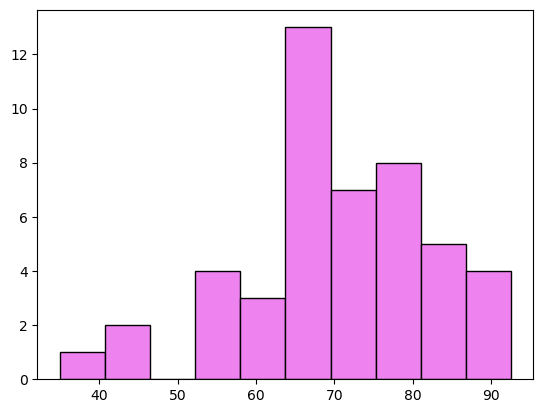

Univariate feature analysis of feature Agriculture: 


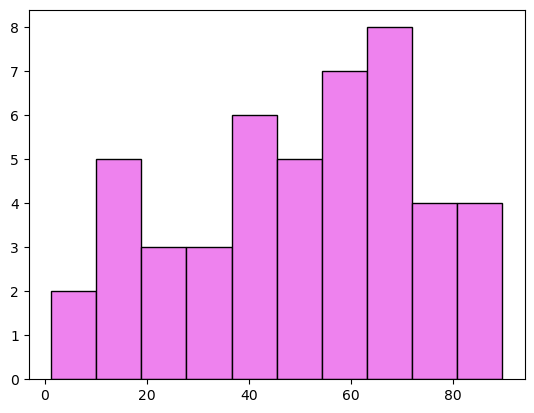

Univariate feature analysis of feature Examination: 


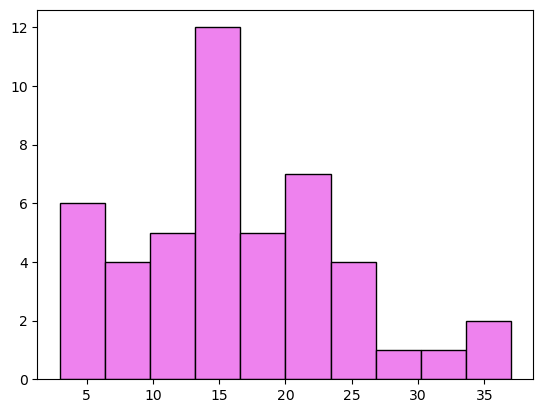

Univariate feature analysis of feature Education: 


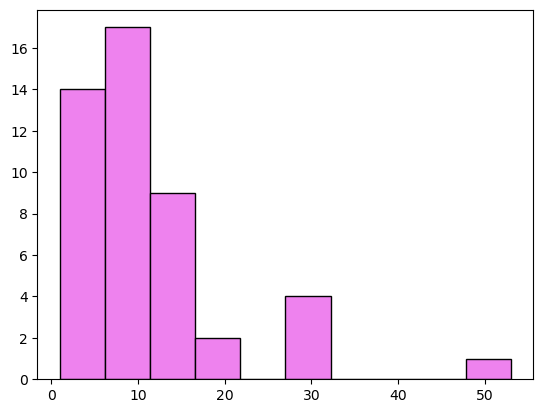

Univariate feature analysis of feature Catholic: 


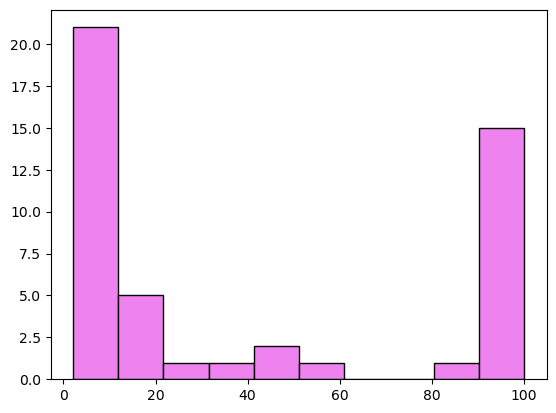

Univariate feature analysis of feature Infant.Mortality: 


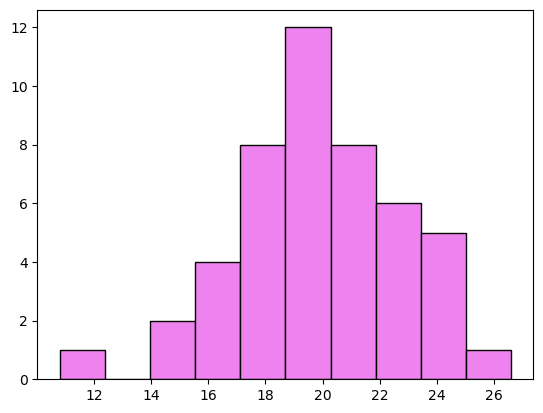

_____________________________________________________
_____________________________________________________



In [88]:
univariate_visulization(swiss)

In [86]:
data('swiss', show_doc=True)

swiss

PyDataset Documentation (adopted from R Documentation. The displayed examples are in R)

## Swiss Fertility and Socioeconomic Indicators (1888) Data

### Description

Standardized fertility measure and socio-economic indicators for each of 47
French-speaking provinces of Switzerland at about 1888.

### Usage

    data(swiss)

### Format

A data frame with 47 observations on 6 variables, each of which is in percent,
i.e., in [0,100].

[,1] Fertility Ig, "common standardized fertility measure" [,2] Agriculture
[,3] Examination nation [,4] Education [,5] Catholic [,6] Infant.Mortality
live births who live less than 1 year.

All variables but 'Fert' give proportions of the population.

### Source

Project "16P5", pages 549-551 in

Mosteller, F. and Tukey, J. W. (1977) “Data Analysis and Regression: A Second
Course in Statistics”. Addison-Wesley, Reading Mass.

indicating their source as "Data used by permission of Franice van de Walle.
Office of Population Research, Princeton Univer

In [165]:
tips['size'].value_counts()

2    156
3     38
4     37
5      5
1      4
6      4
Name: size, dtype: int64

In [95]:
swiss.info()

<class 'pandas.core.frame.DataFrame'>
Index: 47 entries, Courtelary to Rive Gauche
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Fertility         47 non-null     float64
 1   Agriculture       47 non-null     float64
 2   Examination       47 non-null     int64  
 3   Education         47 non-null     int64  
 4   Catholic          47 non-null     float64
 5   Infant.Mortality  47 non-null     float64
dtypes: float64(4), int64(2)
memory usage: 2.6+ KB


In [182]:
def bivariate_visulization(df, target):
    
    cat_cols, num_cols = [], []
    
    for col in df.columns:
        if df[col].dtype == "o":
            cat_cols.append(col)
        else:
            if df[col].nunique() < 10:
                cat_cols.append(col)
            else: 
                num_cols.append(col)
                
    print(f'Numeric Columns: {num_cols}')
    print(f'Categorical Columns: {cat_cols}')
    explore_cols = cat_cols + num_cols

    for col in explore_cols:
        if col in cat_cols:
            if col != target:
                print(f'Bivariate assessment of feature {col}:')
                sns.barplot(data = df, x = df[col], y = df[target], palette='crest')
                plt.show()

        if col in num_cols:
            if col != target:
                print(f'Bivariate feature analysis of feature {col}: ')
                plt.scatter(x = df[col], y = df[target], color='turquoise')
                plt.axhline(df[target].mean(), ls=':', color='red')
                plt.axvline(df[col].mean(), ls=':', color='red')
                plt.show()

    print('_____________________________________________________')
    print('_____________________________________________________')
    print()

Numeric Columns: ['Fertility', 'Agriculture', 'Examination', 'Education', 'Catholic', 'Infant.Mortality']
Categorical Columns: []
Bivariate feature analysis of feature Agriculture: 


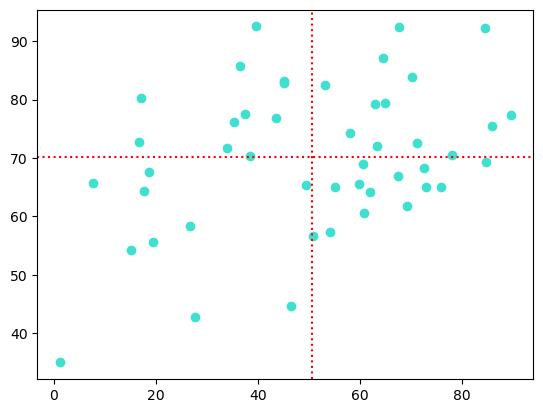

Bivariate feature analysis of feature Examination: 


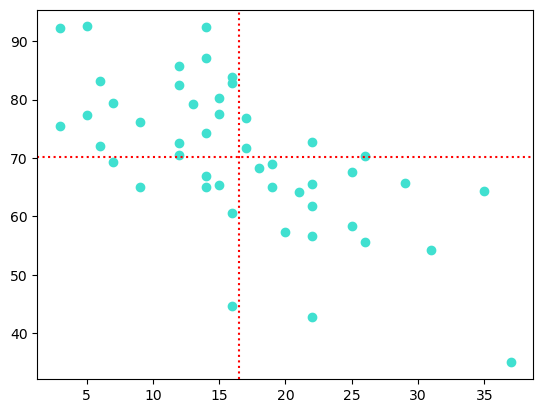

Bivariate feature analysis of feature Education: 


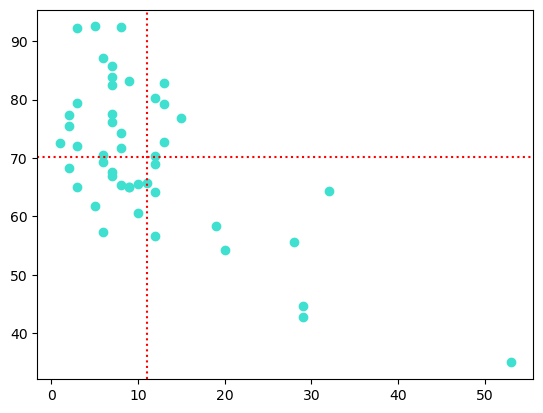

Bivariate feature analysis of feature Catholic: 


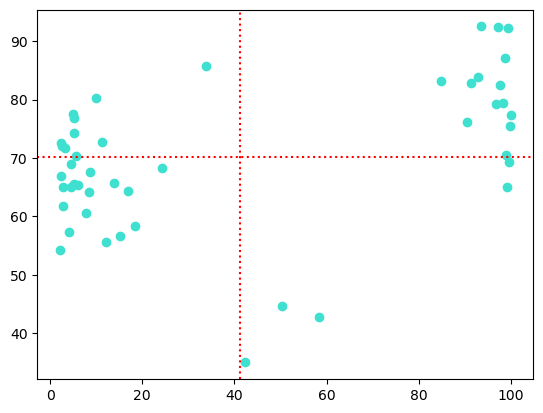

Bivariate feature analysis of feature Infant.Mortality: 


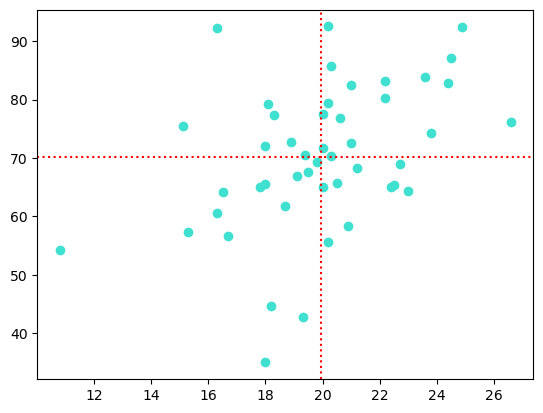

_____________________________________________________
_____________________________________________________



In [181]:
bivariate_visulization(swiss, 'Fertility')

In [138]:
tips = data('tips')
tips.head()

,total_bill,tip,sex,smoker,day,time,size
1,16.99,1.01,Female,No,Sun,Dinner,2
2,10.34,1.66,Male,No,Sun,Dinner,3
3,21.01,3.50,Male,No,Sun,Dinner,3
4,23.68,3.31,Male,No,Sun,Dinner,2
5,24.59,3.61,Female,No,Sun,Dinner,4


Numeric Columns: ['total_bill', 'tip']
Categorical Columns: ['sex', 'smoker', 'day', 'time', 'size']
Bivariate assessment of feature sex:


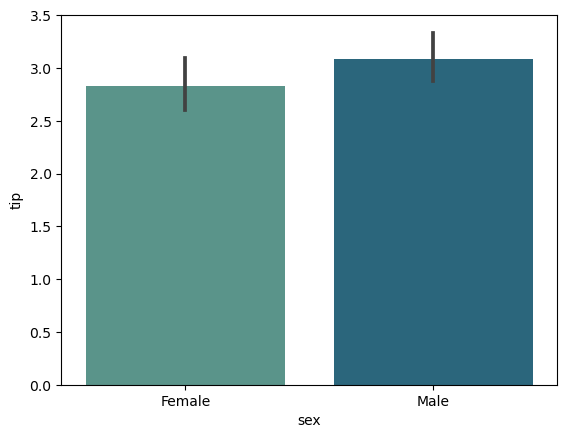

Bivariate assessment of feature smoker:


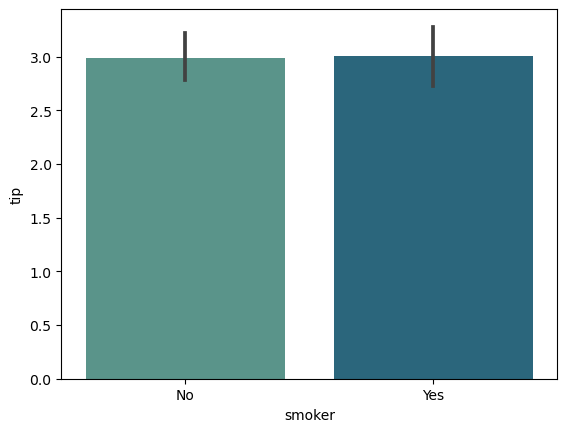

Bivariate assessment of feature day:


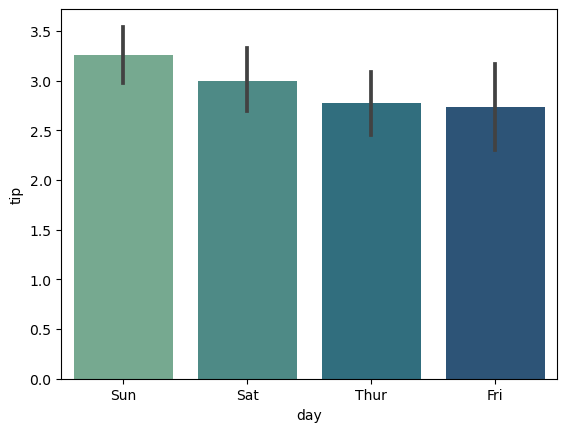

Bivariate assessment of feature time:


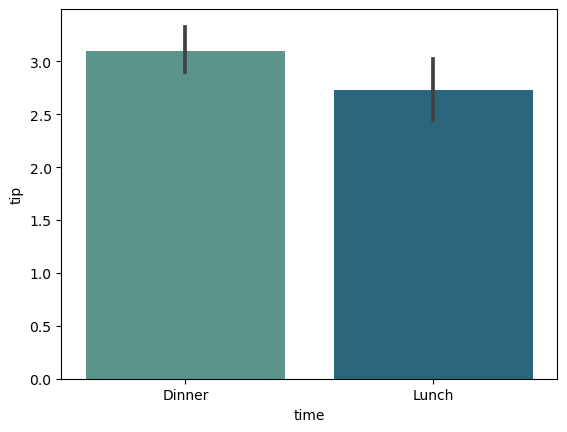

Bivariate assessment of feature size:


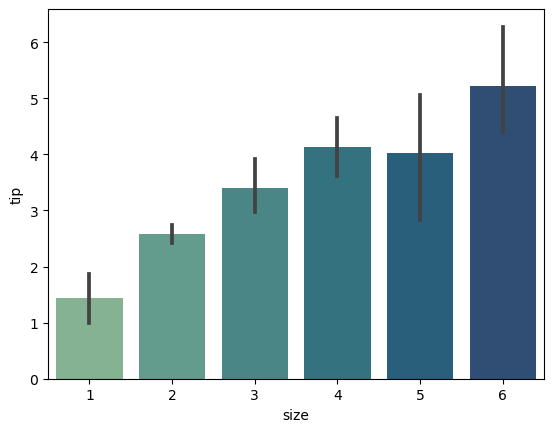

Bivariate feature analysis of feature total_bill: 


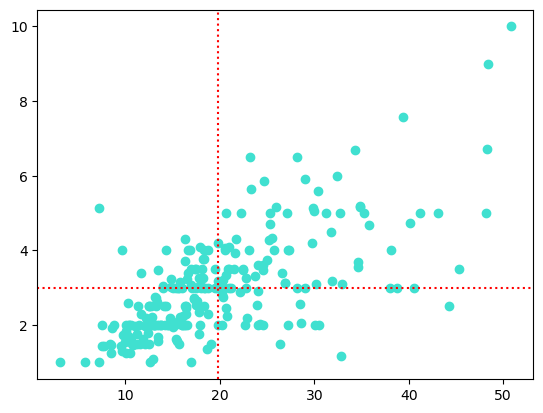

_____________________________________________________
_____________________________________________________



In [183]:
bivariate_visulization(tips, 'tip')

Univariate assessment of feature sex:


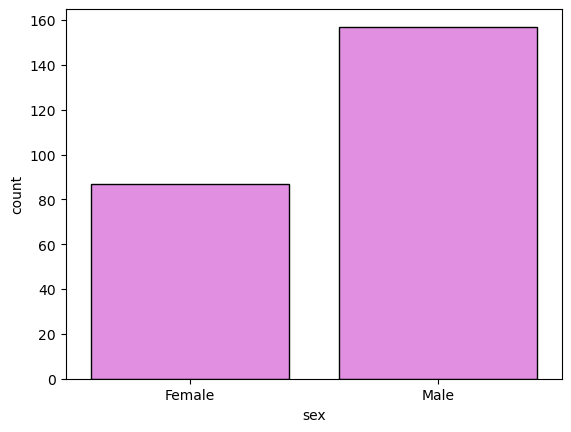

Univariate assessment of feature smoker:


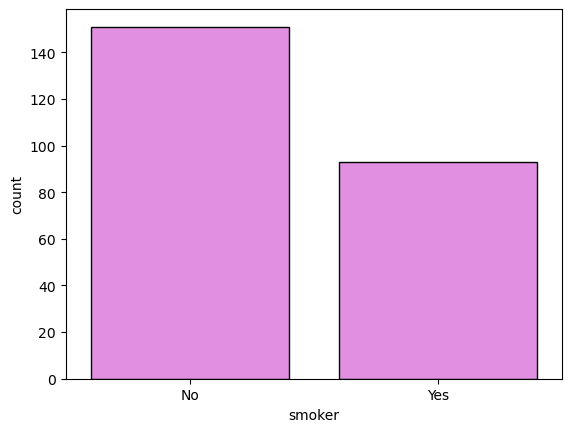

Univariate assessment of feature day:


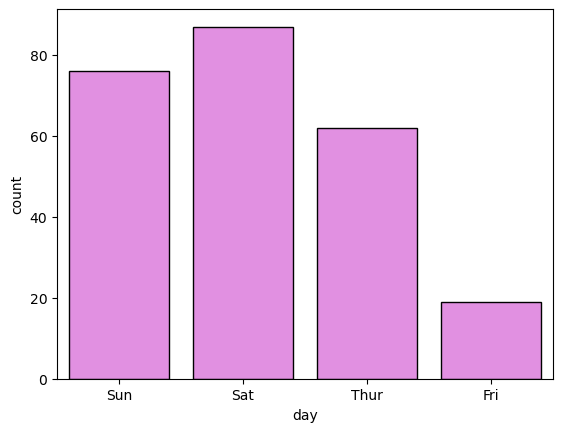

Univariate assessment of feature time:


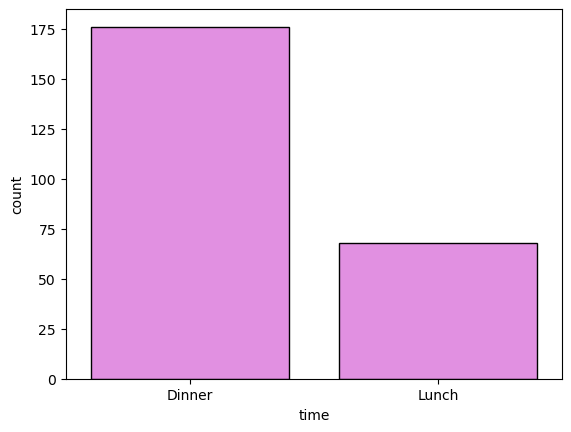

Univariate feature analysis of feature total_bill: 


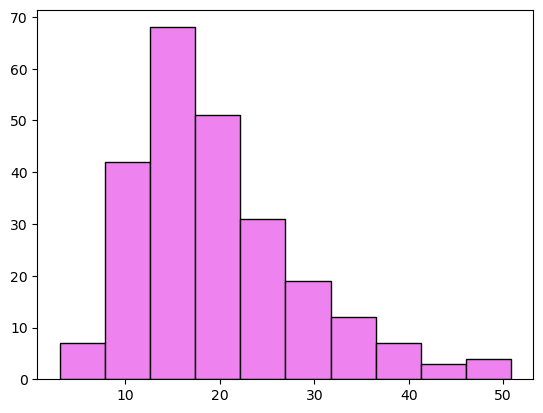

Univariate feature analysis of feature tip: 


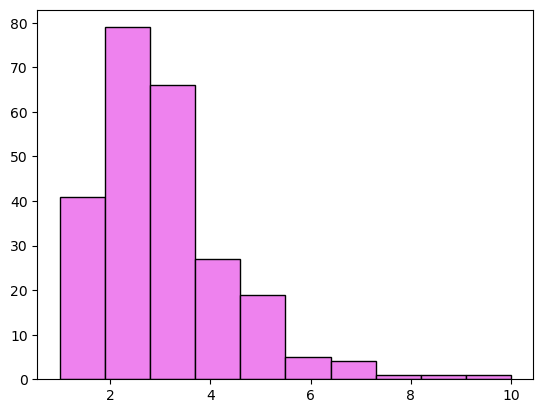

Univariate feature analysis of feature size: 


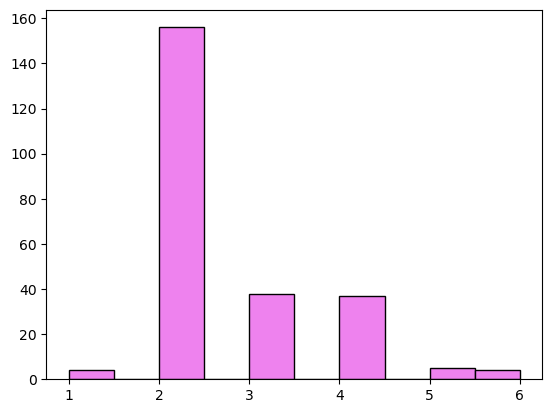

_____________________________________________________
_____________________________________________________



In [147]:
univariate_visulization(tips)

In [175]:
tips['total_bill'].mean()

19.785942622950824